In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

SCALE = 256

# Exercise 2.1.1

In [3]:
# Load the grayscale image
img = cv2.imread('images/Camera Man.bmp', 0)
img_copy = copy.deepcopy(img)


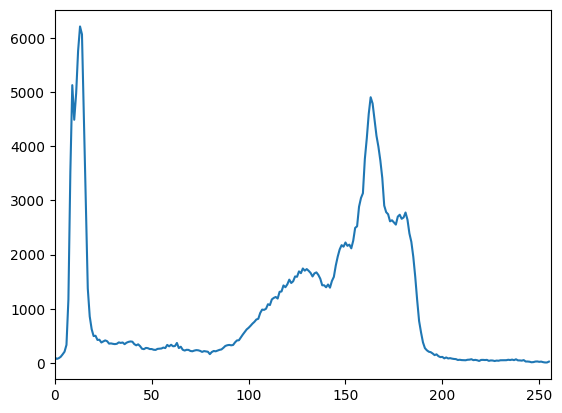

In [4]:
# Compute the histogram using OpenCV's calcHist function
hist = [0]*SCALE
for row in img:
    for column in row:
        hist[column] += 1

hist = np.asanyarray(hist)

# Display the histogram using matplotlib
plt.plot(hist)
plt.xlim([0, SCALE])
plt.show()

# Exercise 2.1.2

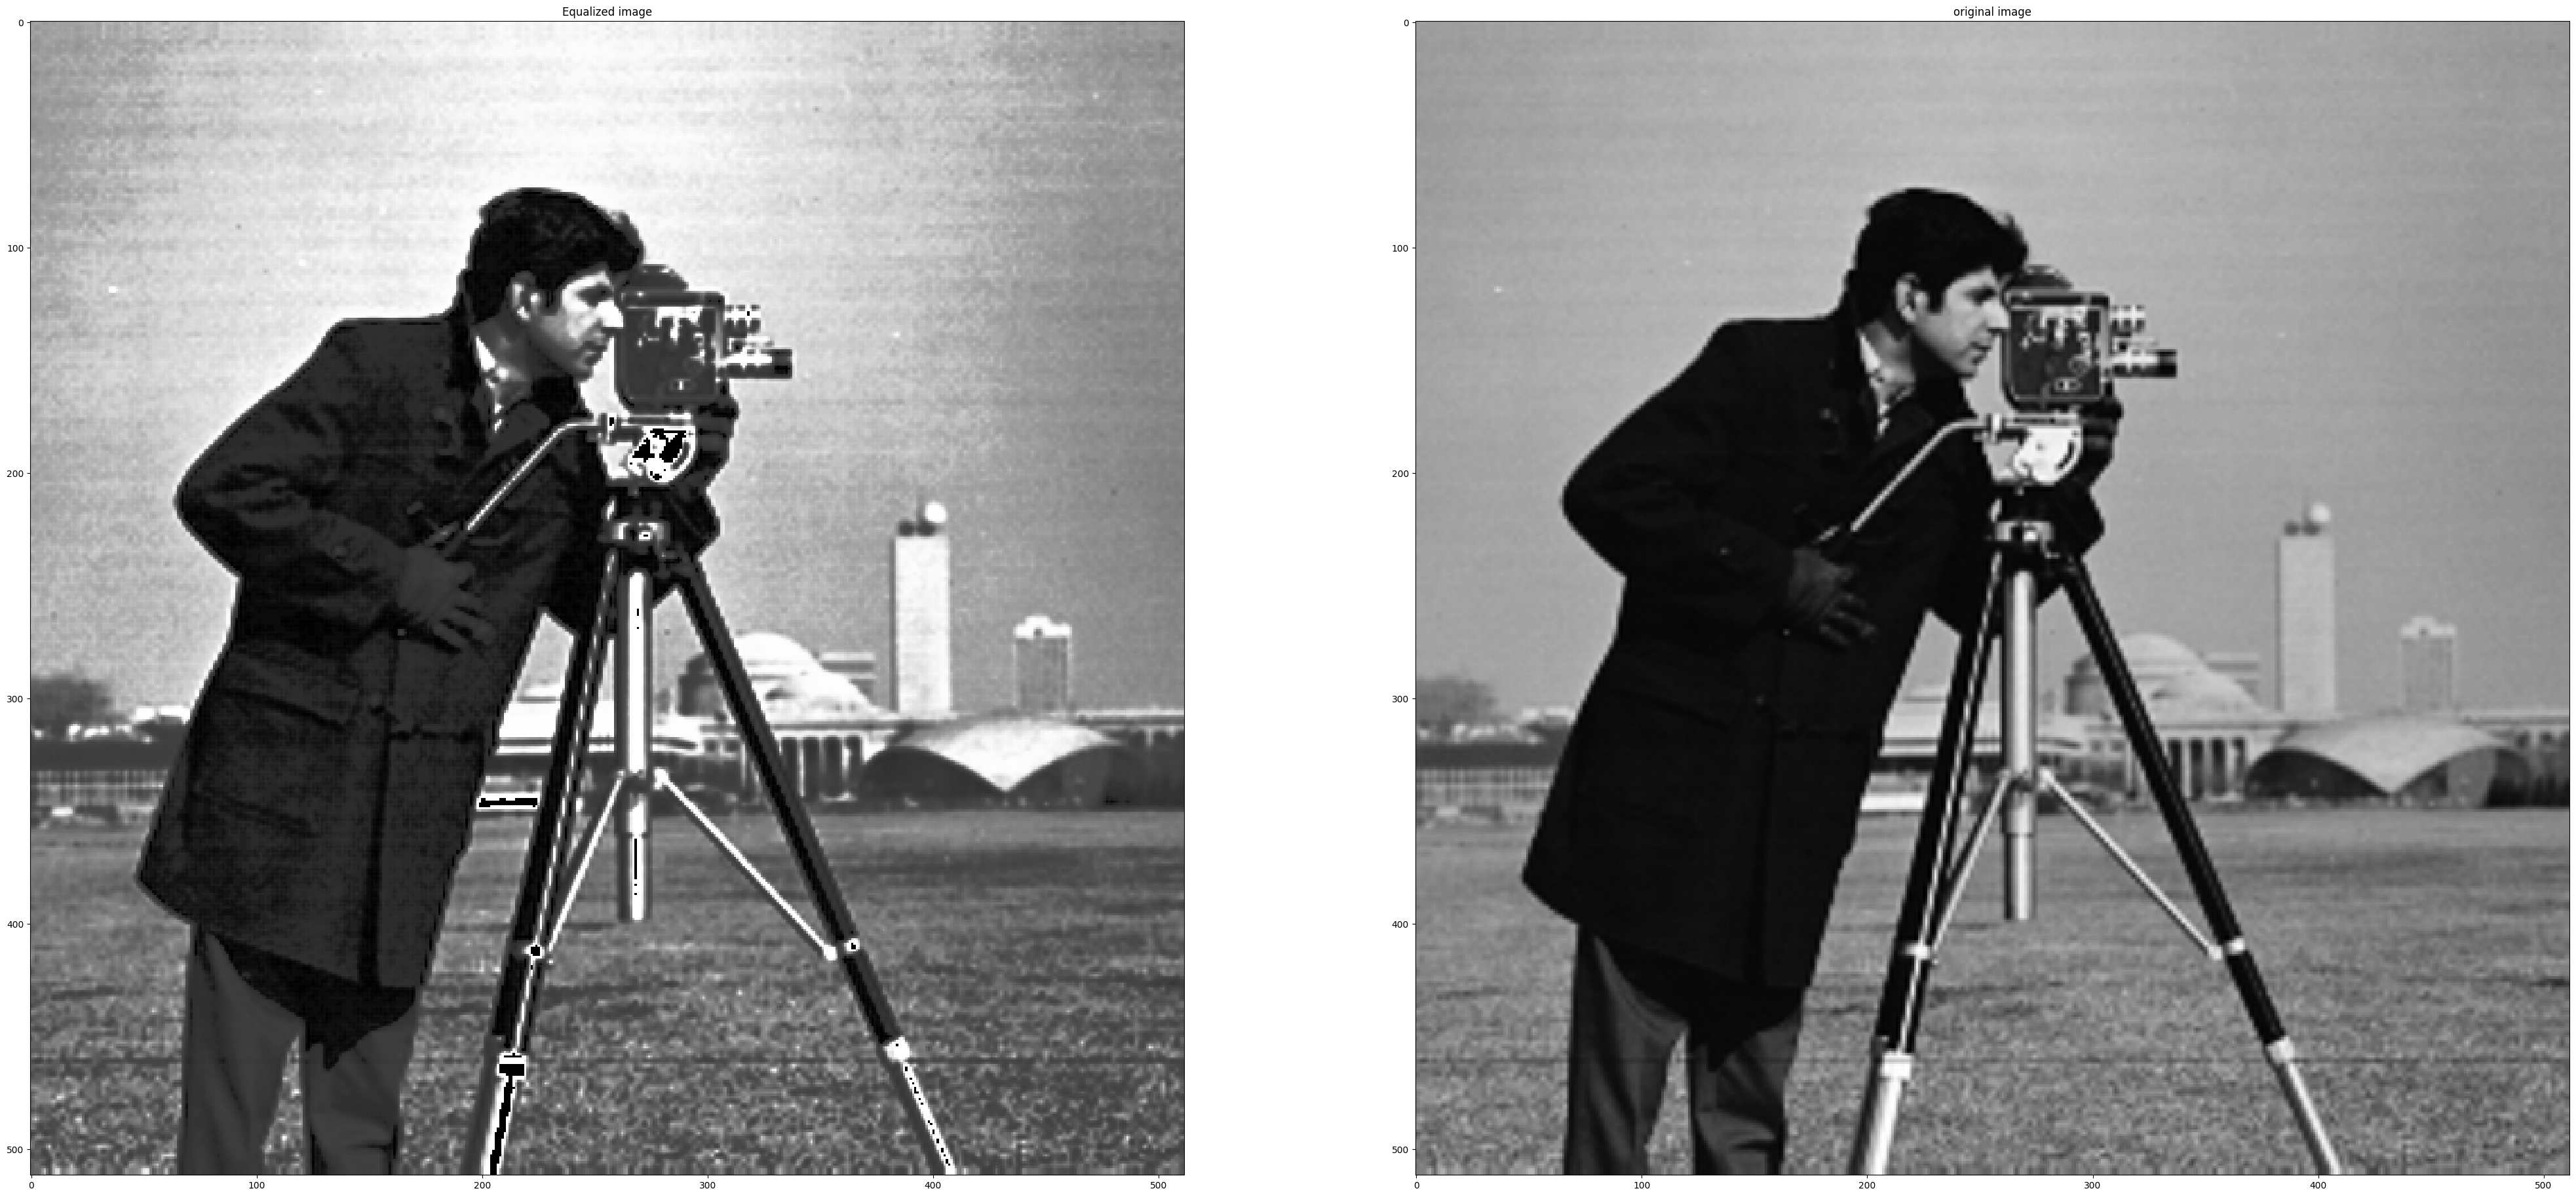

In [5]:
hist_norm = hist / np.sum(hist)

# Create an array of zeros with the same shape as the histogram
intensity_transform = [0]*SCALE

intensity_transform[0] = hist_norm[0]
for i in range(1, SCALE):
    intensity_transform[i] = intensity_transform[i-1] + hist_norm[i]

intensity_transform = np.asanyarray(intensity_transform)
intensity_transform *= SCALE
for i in range(0, SCALE):
    if intensity_transform[i] - int(intensity_transform[i]) > 0.5:
        intensity_transform[i] = int(intensity_transform[i]+1)
    else:
        intensity_transform[i] = int(intensity_transform[i])

new_image = img
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_image[i][j] = intensity_transform[img[i][j]]
        
fig, axs = plt.subplots(1, 2, figsize=(50, 25))
axs[0].imshow(new_image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Equalized image')

axs[1].imshow(img_copy, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('original image')


plt.show()

# Exercise 2.2.1

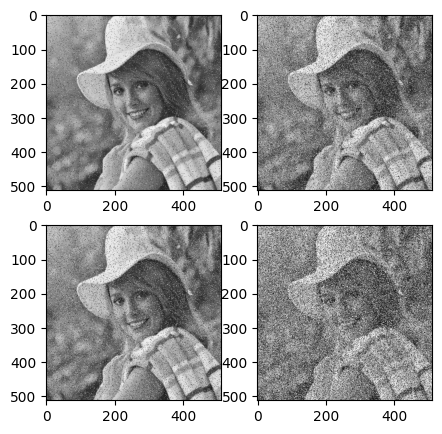

In [6]:
# Load an image
elaine_img = cv2.imread('images/Elaine.bmp', cv2.IMREAD_GRAYSCALE)

# Define a noise density (i.e., the proportion of pixels to be affected by noise)
noise_density = [0.05, 0.1, 0.2, 0.4]

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
j = 0.0
noisy_images = []
for i in range(len(noise_density)):
    # Generate a random mask of salt-and-pepper noise
    mask = np.random.choice((0, 1, 2), size=elaine_img.shape[:2], p=[1 - noise_density[i], noise_density[i]/2., noise_density[i]/2.])

    # Apply the mask to the image to add noise
    noisy_img = np.copy(elaine_img)
    noisy_img[mask == 1] = 255  # Salt noise
    noisy_img[mask == 2] = 0    # Pepper noise
    noisy_images.append(noisy_img)
    
    # Display the noisy image
    axs[i%2][int(j)].imshow(noisy_img, cmap='gray', vmin=0, vmax=255)
    
    j += 0.5


In [7]:
def median_filter(noisy_image, size):
    filtered = np.zeros_like(noisy_image)
    for i in range(noisy_image.shape[0]):
        for j in range(noisy_image.shape[1]):
            diff_i = 0
            diff_j = 0
            if (i+size) > noisy_image.shape[0]:
                diff_i = i + size - noisy_image.shape[0]
                if (j+size) > noisy_image.shape[1]:
                    diff_j = j + size - noisy_image.shape[1]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j:j+size]
            elif (j+size) > noisy_image.shape[1]:
                diff_j = j + size - noisy_image.shape[1]
                if (i+size) > noisy_image.shape[0]:
                    diff_i = i + size - noisy_image.shape[0]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i:i+size, j-diff_j:noisy_image.shape[1]]
            else:
                neighborhood = noisy_image[i:i+size, j:j+size]
            median = np.median(neighborhood)
            filtered[i, j] = median
    return filtered

In [12]:
from sklearn.metrics import mean_squared_error

# set the window size
window_size = [3, 5, 7, 9]

# perform best median filtering for each image
best_windows = []

for i in range(len(noisy_images)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = median_filter(noisy_images[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]}")
        if err < min_error:
            min_error = err
            best_win = window_size[j]
    best_windows.append(best_win)

for i in range(len(best_windows)):
    print(f'best window for image {i} is {best_windows[i]}')
# display the filtered image
# plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)
# plt.show()

got error=28.06493377685547 for noisy image 0 with window_size=3
got error=32.68951416015625 for noisy image 0 with window_size=5
got error=34.7756233215332 for noisy image 0 with window_size=7
got error=38.20945358276367 for noisy image 0 with window_size=9
got error=29.13821792602539 for noisy image 1 with window_size=3
got error=33.29957962036133 for noisy image 1 with window_size=5
got error=35.25507736206055 for noisy image 1 with window_size=7
got error=38.64505386352539 for noisy image 1 with window_size=9
got error=31.74527359008789 for noisy image 2 with window_size=3
got error=34.760501861572266 for noisy image 2 with window_size=5
got error=36.15787887573242 for noisy image 2 with window_size=7
got error=39.241939544677734 for noisy image 2 with window_size=9
got error=39.703880310058594 for noisy image 3 with window_size=3
got error=38.32512664794922 for noisy image 3 with window_size=5
got error=38.63351821899414 for noisy image 3 with window_size=7
got error=41.0687561035

# Exercise 2.2.2

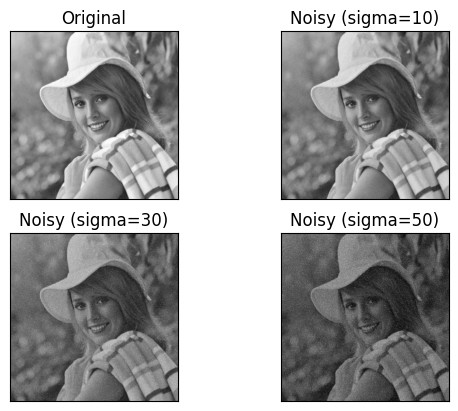

In [19]:
# Define the standard deviations for the Gaussian noise
sigmas = [10, 30, 50]

# Add Gaussian noise to the image with different variances
noisy_imgs = []
for sigma in sigmas:
    noise = np.uint8(np.clip(np.random.normal(loc=0, scale=sigma, size=elaine_img.shape), 0, 255))
    noisy_img = cv2.addWeighted(elaine_img, 0.5, noise, 0.5, 0)
    noisy_imgs.append(noisy_img)

# Display the original image and the noisy images
titles = ['Original', 'Noisy (sigma=10)', 'Noisy (sigma=30)', 'Noisy (sigma=50)']
images = [img] + noisy_imgs

for i in range(len(titles)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [20]:
def average_filter(noisy_image, size):
    filtered = np.zeros_like(noisy_image)
    for i in range(noisy_image.shape[0]):
        for j in range(noisy_image.shape[1]):
            diff_i = 0
            diff_j = 0
            if (i+size) > noisy_image.shape[0]:
                diff_i = i + size - noisy_image.shape[0]
                if (j+size) > noisy_image.shape[1]:
                    diff_j = j + size - noisy_image.shape[1]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j:j+size]
            elif (j+size) > noisy_image.shape[1]:
                diff_j = j + size - noisy_image.shape[1]
                if (i+size) > noisy_image.shape[0]:
                    diff_i = i + size - noisy_image.shape[0]
                    neighborhood = noisy_image[i-diff_i:noisy_image.shape[0], j-diff_j:noisy_image.shape[1]]
                else:
                    neighborhood = noisy_image[i:i+size, j-diff_j:noisy_image.shape[1]]
            else:
                neighborhood = noisy_image[i:i+size, j:j+size]
            median = np.mean(neighborhood)
            filtered[i, j] = median
    return filtered

In [21]:
window_size = [3, 5, 7, 9]

# perform median filtering for each image
for i in range(len(noisy_imgs)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = median_filter(noisy_imgs[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]} by median filtering")

            
# perform average filtering for each image
for i in range(len(noisy_imgs)):
    min_error = 99999999
    best_win = 0
    for j in range(len(window_size)):
        filtered_img = average_filter(noisy_imgs[i], size=window_size[j])
        err = mean_squared_error(elaine_img,filtered_img)
        print(f"got error={err} for noisy image {i} with window_size={window_size[j]} by average filtering")

got error=117.67346954345703 for noisy image 0 with window_size=3 by median filtering
got error=116.9429817199707 for noisy image 0 with window_size=5 by median filtering
got error=116.68026351928711 for noisy image 0 with window_size=7 by median filtering
got error=116.22725677490234 for noisy image 0 with window_size=9 by median filtering
got error=117.59890365600586 for noisy image 1 with window_size=3 by median filtering
got error=116.85902786254883 for noisy image 1 with window_size=5 by median filtering
got error=116.36326599121094 for noisy image 1 with window_size=7 by median filtering
got error=116.11694717407227 for noisy image 1 with window_size=9 by median filtering
got error=116.95097351074219 for noisy image 2 with window_size=3 by median filtering
got error=116.62659454345703 for noisy image 2 with window_size=5 by median filtering
got error=116.30290985107422 for noisy image 2 with window_size=7 by median filtering
got error=116.02288818359375 for noisy image 2 with win

# Exercise 2.2.3

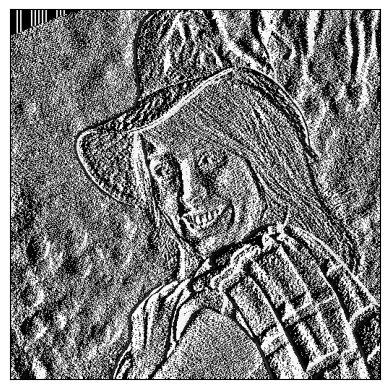

In [30]:
from scipy.ndimage import convolve

# Define the kernel
kernel = 1/2 * np.array([1, 0, -1])

# Load the image
img = elaine_img

# Apply the kernel to the image along the x-axis
filtered_img = convolve(img, np.expand_dims(kernel, axis=0))

plt.imshow(filtered_img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()